# Lending Club Case Study

In [43]:
# importing all the required libraries

import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt    # datetime module

#importing warnings library to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

#importing visualization libraries
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import seaborn as sns  #visualization

import plotly.offline as py                 #visualization
py.init_notebook_mode(connected=True)       #visualization
import plotly.graph_objs as go              #visualization
import plotly.tools as tls                  #visualization
import plotly.figure_factory as ff          #visualization

In [44]:
#reading dataset from csv file
loan = pd.read_csv('loan.csv')

# setting up the number of columns and rows to be displayed 
pd.set_option("display.max_columns", None)   # setting max columns view
pd.set_option('display.max_rows', 120)       # setting 120 rows view

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [45]:
# Viewing basic information about the dataset

rows = loan.shape[0] 
cols = loan.shape[1]
print ("Rows     : " ,loan.shape[0])
print ("Columns  : " ,loan.shape[1])
print ("\nFeatures : \n" ,loan.columns.tolist())
print ("\nPercentage wise missing values in each column:\n\n", 100*loan.isnull().sum()/len(loan.index))

Rows     :  39717
Columns  :  111

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'ope

In [46]:
# Checking datatype of all columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Cleaning the dataset

In [47]:
# dropping columns having null values more than 60%

print('Shape before removal', loan.shape)
loan = loan.loc[:, (100*loan.isnull().sum()/len(loan.index))<60]
print('Shape after removal' , loan.shape)

Shape before removal (39717, 111)
Shape after removal (39717, 54)


In [48]:
# dropping columns where most of the values are same

print(loan['policy_code'].value_counts())
print(loan['initial_list_status'].value_counts())
print(loan['collections_12_mths_ex_med'].value_counts())
print(loan['acc_now_delinq'].value_counts())
print(loan['chargeoff_within_12_mths'].value_counts())
print(loan['delinq_amnt'].value_counts())
print(loan['tax_liens'].value_counts())
print(loan['pymnt_plan'].value_counts())

loan.drop(columns=['policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'chargeoff_within_12_mths', 'pymnt_plan'], inplace=True)

print('\n\nShape after removal' , loan.shape)

1    39717
Name: policy_code, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64


Shape after removal (39717, 46)


In [49]:
# dropping application type column since all the application type has same value "INDIVIDUAL"
print(loan['application_type'].value_counts())

loan.drop(columns='application_type', inplace=True)

INDIVIDUAL    39717
Name: application_type, dtype: int64


In [50]:
# dropping columns which are not required in our data analysis
loan.drop(columns=['member_id', 'installment', 'emp_title', 'url', 'desc', 
                   'zip_code', 'title', 'revol_bal', 'revol_util', 'earliest_cr_line', 
                   'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], inplace=True)

print('Shape after removal' , loan.shape)

Shape after removal (39717, 32)


In [51]:
# viewing the count of each value for employment length
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [52]:
# converting '10+ years' to 10 and '< 1 year' to 0.5 and in all others, just removing ' years'.
# Also converting object type to float
loan.emp_length = loan.emp_length.replace({'< 1 year': 0.5, '10+ years': 10, '2 years': 2, '3 years': 3, 
                                           '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, 
                                           '8 years': 8, '9 years': 9, '1 year': 1})

# There are some null values which we assume that the applicants were doing odd jobs or part-time jobs
# imputing all null values with lowest experience i.e., '0.5'
loan['emp_length'] = loan['emp_length'].fillna(0.5)

In [53]:
# Checking pub_rec_bankrupties
loan.pub_rec_bankruptcies.isnull().sum()

697

In [54]:
# imputing null values on pub_rec_bankruptcies column with the median value i.e., 0.0
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median())

In [56]:
# rounding off the float column values to 2 decimal places

amount_fields = ['funded_amnt_inv', 'annual_inc', 'dti', 'out_prncp', 
                 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'] 

for i in amount_fields:
    loan[i] = loan[i].apply(lambda x: round(x, 2))

In [57]:
# removing % sign from interest rate and also converting to float from object type

loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x.replace('%', '')))

In [58]:
# converting issue date column to datetime format from object type

loan['issue_d'] = loan['issue_d'].apply(lambda x : dt.datetime.strptime(x, '%b-%y'))

### Creating derived columns for business insights

In [59]:
# Creating issue month and issue year from issue date
loan['issue_d_year'] = loan['issue_d'].dt.year
loan['issue_d_month'] = loan['issue_d'].dt.month_name()

#### Creating buckets for - annual_inc, loan_amnt, int_rate

In [60]:
# Creating buckets for annual income 
def annual_inc_bucket_fn(column):
    if column <= 20000:
        return '0_20k'
    elif (column >20000) and (column <= 40000):
        return '20k_40k'    
    elif (column >40000) and (column <= 60000):
        return '40k_60k'
    elif (column >60000) and (column <= 80000):
        return '60k_80k'
    else:
        return 'above_80k'
    
loan['annual_inc_bucket'] = loan.apply(lambda x: annual_inc_bucket_fn(x.annual_inc), axis = 1)

# Creating buckets for loan amount
def loan_amnt_bucket_fn(column):
    if column <= 5000:
        return '0_5k'  
    elif (column >5000) and (column <= 10000):
        return '5k_10k'      
    elif (column >10000) and (column <= 15000):
        return '10k_15k'  
    else:
        return 'above_15k'
    
loan['loan_amnt_bucket'] = loan.apply(lambda x : loan_amnt_bucket_fn(x.loan_amnt), axis = 1)

# Creating buckets for interest rate 
def int_rate_bucket_fn(column):
    if column <= 9:
        return '0_9'
    elif (column >9) and (column <= 12):
        return '9_12'    
    elif (column >12) and (column <= 15):
        return '12_15'
    elif (column >15) and (column <= 18):
        return '15_18'
    elif (column >18) and (column <= 21):
        return '18_21'
    else:
        return 'above_21'
    
loan['int_rate_bucket'] = loan.apply(lambda x : int_rate_bucket_fn(x.int_rate), axis = 1)

## Starting Univariate Analysis

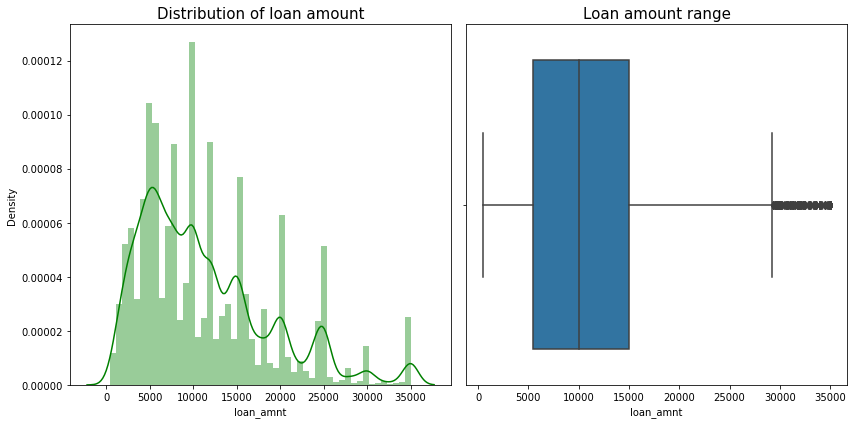

In [61]:
# Analysis on loan amount
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(loan['loan_amnt'], hist=True, kde=True, color='g', ax=axes[0])

sns.boxplot(loan['loan_amnt'], ax=axes[1])
axes[0].set_title('Distribution of loan amount', fontsize=15)
axes[1].set_title('Loan amount range', fontsize=15)
plt.tight_layout()
plt.show()

**The above plots show that the majority of the loan amount ranges from 5k to 15k and maximum goes upto 35k**

---------

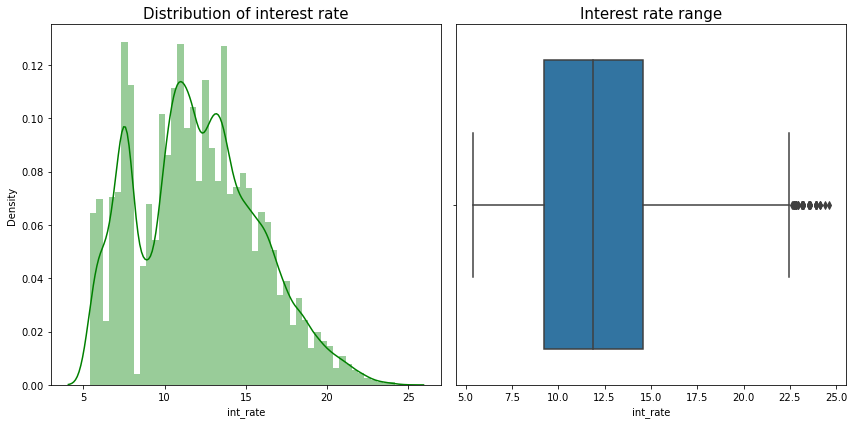

In [62]:
# Analysis on interest rate
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(loan['int_rate'], hist=True, kde=True, color='g', ax=axes[0])

sns.boxplot(loan['int_rate'], ax=axes[1])
axes[0].set_title('Distribution of interest rate', fontsize=15)
axes[1].set_title('Interest rate range', fontsize=15)
plt.tight_layout()
plt.show()

**The above plots show that the majority of loan have interest rate range from 9% - 15%. Maximum it goes upto 25%**

-----------

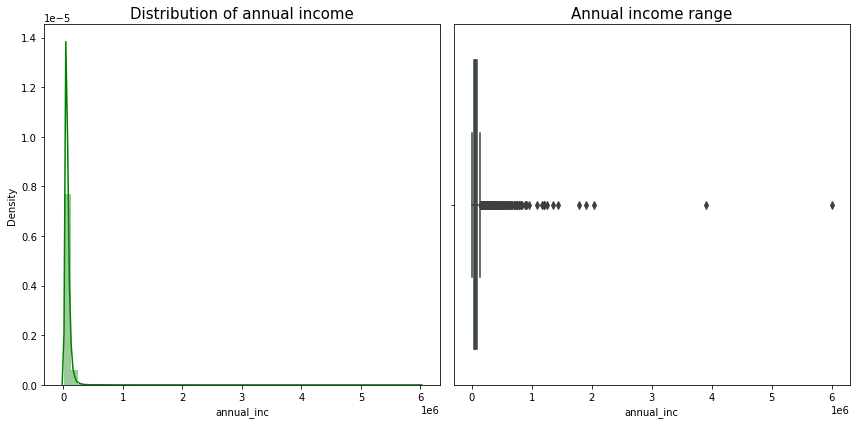

In [63]:
# Analysis on annual income
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(loan['annual_inc'], hist=True, kde=True, color='g', ax=axes[0])

sns.boxplot(loan['annual_inc'], ax=axes[1])
axes[0].set_title('Distribution of annual income', fontsize=15)
axes[1].set_title('Annual income range', fontsize=15)
plt.tight_layout()
plt.show()

# the below plot shows that there are few outliers in annual income. 
# Let's treat these outliers in order to make our analays smooth.

187000.0


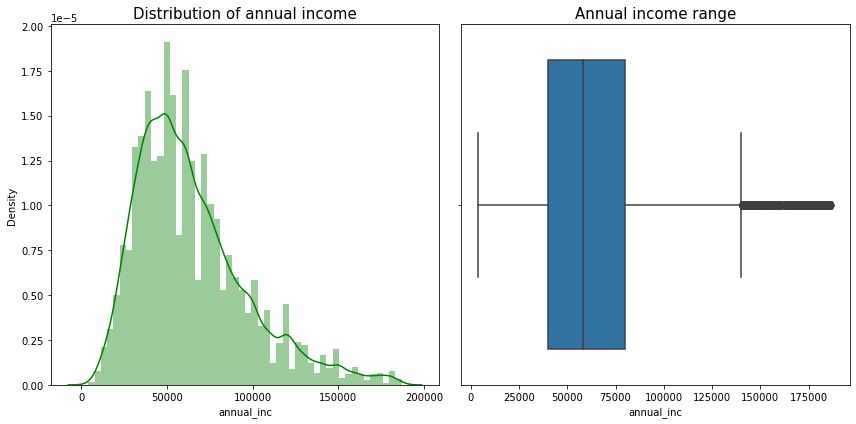

In [64]:
# marking values above 98th quantile as outliers 
outlier = loan.annual_inc.quantile(.98)
print(outlier)

loan = (loan[loan['annual_inc'] < outlier])

fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(loan['annual_inc'], hist=True, kde=True, color='g', ax=axes[0])

sns.boxplot(loan['annual_inc'], ax=axes[1])
axes[0].set_title('Distribution of annual income', fontsize=15)
axes[1].set_title('Annual income range', fontsize=15)
plt.tight_layout()
plt.show()

**After treating the outliers in annual income, boxplot looks much better. Most of applicants have income less than $80000 year**

-----

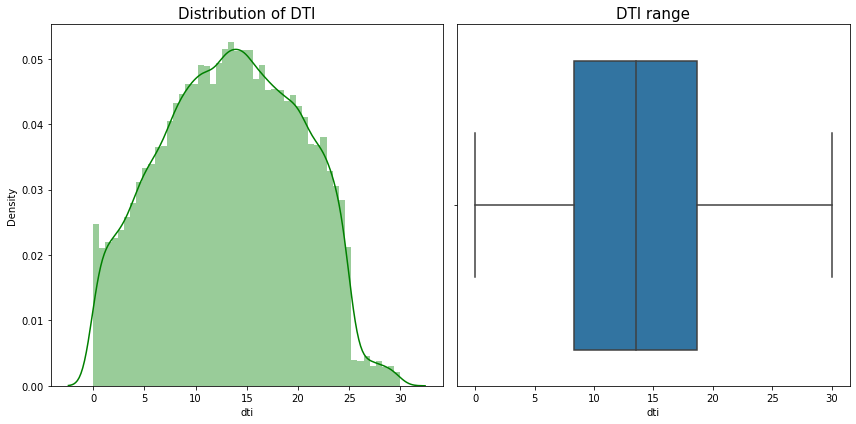

In [65]:
# Analysis on Debt to Income (dti)
fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.distplot(loan['dti'], hist=True, kde=True, color='g', ax=axes[0])


sns.boxplot(loan['dti'], ax=axes[1])
axes[0].set_title('Distribution of DTI', fontsize=15)
axes[1].set_title('DTI range', fontsize=15)
plt.tight_layout()
plt.show()

**The above plots show that the DTI ranges from 0 - 30.**

---

In [66]:
# Analysis on loan status 
trace = go.Pie(labels = loan["loan_status"].value_counts().keys().tolist(),
               values = loan["loan_status"].value_counts().values.tolist(),
               marker = dict(line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Loan Status: ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)
plt.show()

# The Pie plot shows that around 14% of loans are "Charged Off" where applicant has not paid the instalments
# in due time for a long period of time, i.e., he/she has defaulted on the loan

In [67]:
# Dropping records where loan status is "Current". These records are not further required in our analysis.
loan = loan[loan['loan_status'] != 'Current']

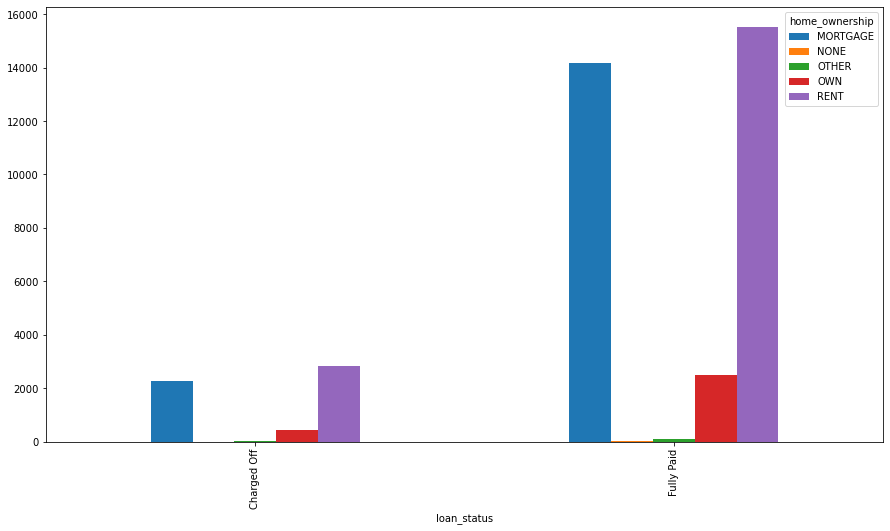

In [68]:
# Analysis on home ownership
loan.groupby('loan_status')['home_ownership'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**Most of the applicant's home ownership status is "Mortgage" or "Rent". This number is also high in Charged Off loans.**

--------

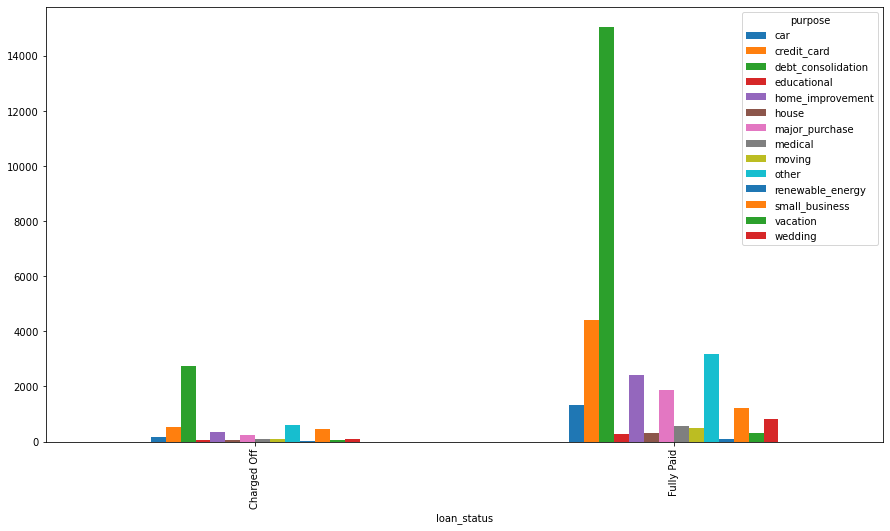

In [69]:
# Analysis on purpose
loan.groupby('loan_status')['purpose'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**The above plot shows that the purpose on majority of loans are debt consolidation. The number is also high on Charged Off loans.**

-----

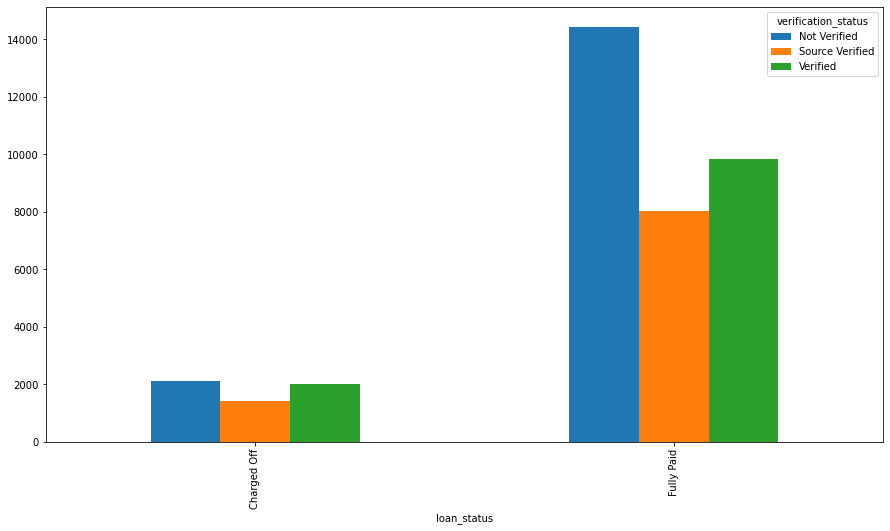

In [70]:
# Analysis on verification status
loan.groupby('loan_status')['verification_status'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**The above plot shows that on most of loans, income verification status is Not Verified. This number is also high on Charged Off loans.**

--------

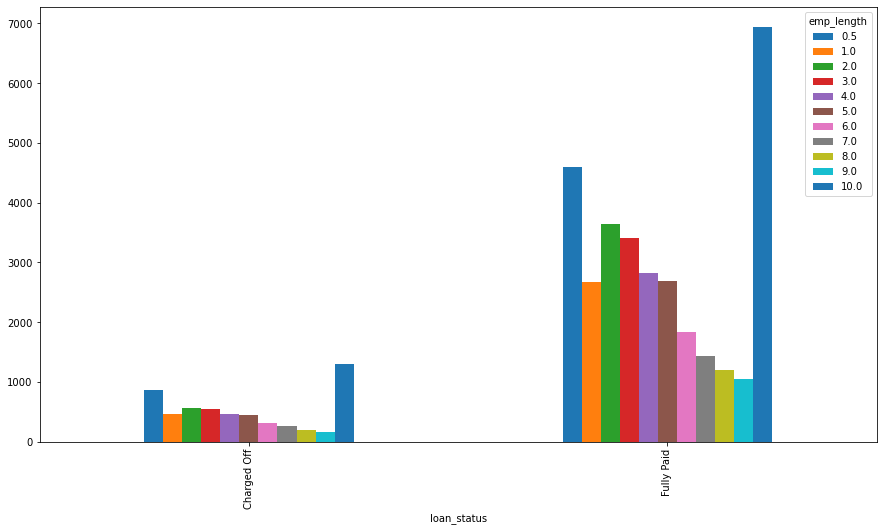

In [71]:
# Analysis on employment length
loan.groupby('loan_status')['emp_length'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**The above plot shows that most of the applicants employment length is 10+ years and 0.5 years. This number is also high on Charged Off loans.**

----

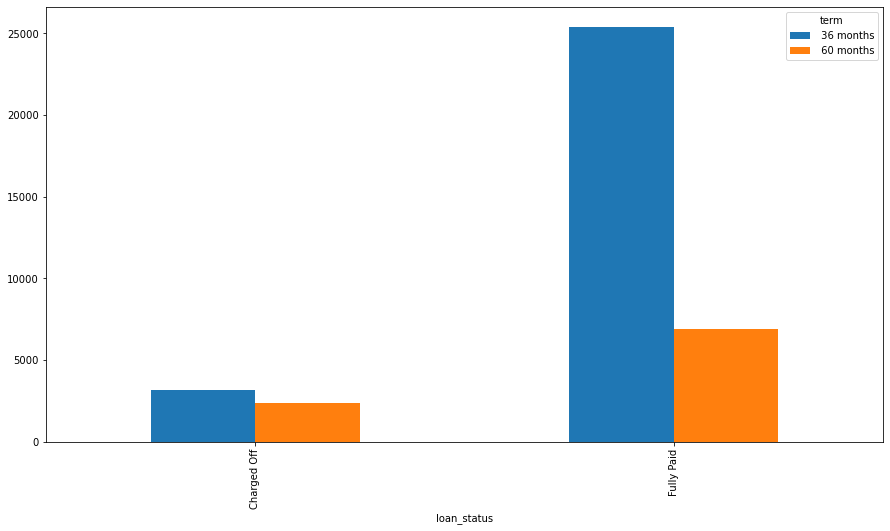

In [72]:
# Analysis on loan term
loan.groupby('loan_status')['term'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**Most of loans have 36 months term. This number is also high in Charged Off loans but the ratio of 60 months is higher on Charged Off as compared to 36 months.** 

-----

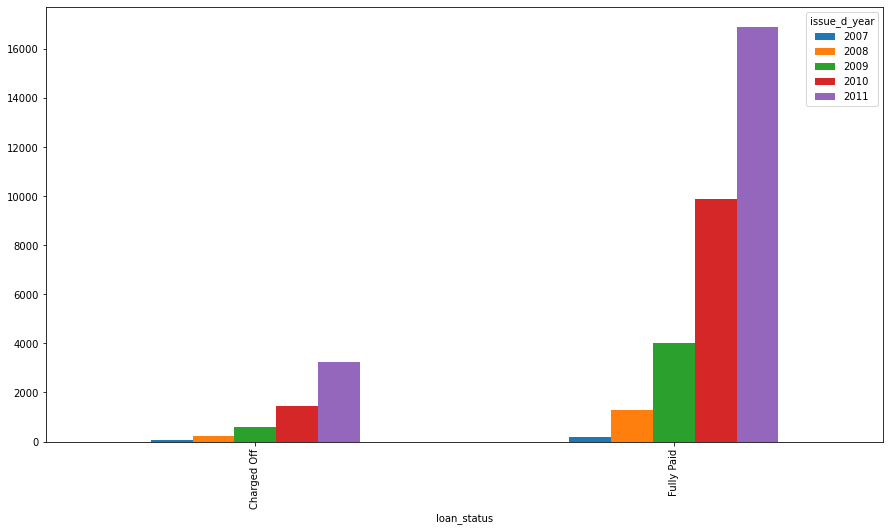

In [73]:
# Analysis on loans issued year wise
loan.groupby('loan_status')['issue_d_year'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**The number of loan increased each year and same goes for Charged Off loans.**

----

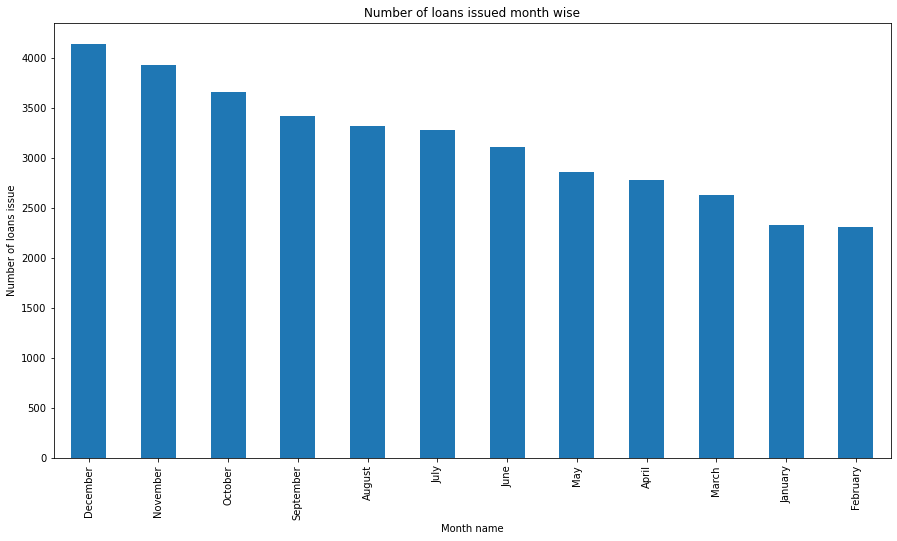

In [74]:
# Analysis on loans issued month wise
plt.title('Number of loans issued month wise')
plt.xlabel('Month name')
plt.ylabel('Number of loans issue')
loan['issue_d_month'].value_counts().plot(kind='bar', figsize=[15,8])
plt.show()

**The above plot shows that majority of loans applied between October to December. It could be due to the holiday season when people plan to buy new things or planning for the vacations.**

----

## Bivariate Analysis

**Since most of the data values are high in both "Fully Paid" and "Charged Off" records. It is difficult to find the driving variables behind Charged Off on the basis of count.**

**We will calculate the ratio of each variable against Charged Off to find out the driving factors.**

In [75]:
# Bivariate analysis on annual income.

ratio_wise = loan.pivot_table(index='annual_inc_bucket', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise

loan_status,annual_inc_bucket,Charged Off,Fully Paid,Total,Charged Off Ratio
0,0_20k,237,943,1180,20.084746
1,20k_40k,1514,7004,8518,17.774125
2,40k_60k,1729,9534,11263,15.351150
3,60k_80k,1024,6597,7621,13.436557
4,above_80k,1044,8177,9221,11.321982


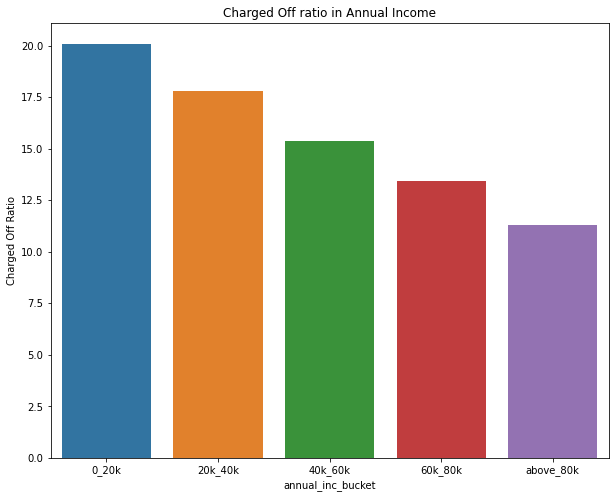

In [76]:
plt.figure(figsize=[10,8])
plt.title('Charged Off ratio in Annual Income')
sns.barplot(ratio_wise['annual_inc_bucket'], ratio_wise['Charged Off Ratio'])
plt.show()

**The above plot shows that the ratio on Charged Off loans is higher where applicants annual income is upto 20k.**

---------

In [77]:
# Analysis on Loan purpose

ratio_wise = loan.pivot_table(index='purpose', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Charged Off Ratio
11,small_business,469,1227,1696,27.653302
10,renewable_energy,18,79,97,18.556701
3,educational,54,265,319,16.927900
9,other,617,3172,3789,16.283980
5,house,57,296,353,16.147309
7,medical,106,555,661,16.036309
8,moving,90,476,566,15.901060
2,debt_consolidation,2742,15036,17778,15.423557
12,vacation,53,319,372,14.247312
4,home_improvement,335,2405,2740,12.226277


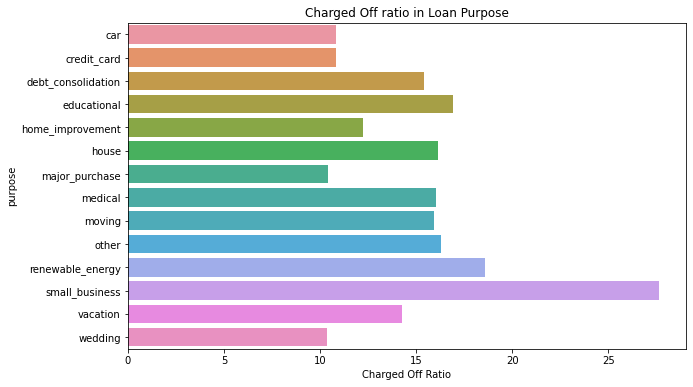

In [78]:
plt.figure(figsize=[10,6])
plt.title('Charged Off ratio in Loan Purpose')
sns.barplot(ratio_wise['Charged Off Ratio'], ratio_wise['purpose'])
plt.show()

**The above plot shows that the loan taken for Small Business purpose are likely to get Charged Off.**

---

In [79]:
# Analysis on Interest Rate

ratio_wise = loan.pivot_table(index='int_rate_bucket', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,int_rate_bucket,Charged Off,Fully Paid,Total,Charged Off Ratio
5,above_21,141,179,320,44.062500
3,18_21,576,1250,1826,31.544359
2,15_18,1331,4290,5621,23.679061
1,12_15,1625,8096,9721,16.716387
4,9_12,1294,9349,10643,12.158226
0,0_9,581,9091,9672,6.007031


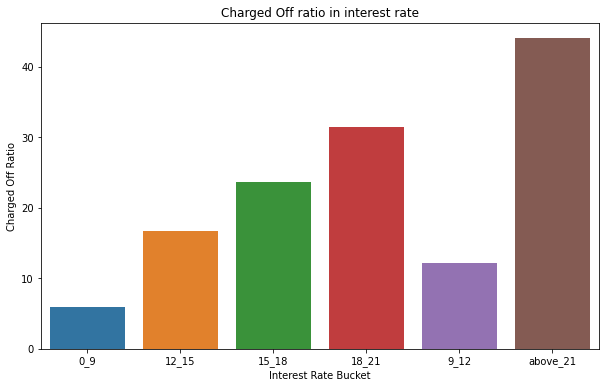

In [80]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['int_rate_bucket'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Interest Rate Bucket', ylabel='Charged Off Ratio', title="Charged Off ratio in interest rate")
plt.show()

**The above plot shows that the chances of getting Charged Off are increasing as the rate of interest is increasing.**

-------

In [81]:
# Analysis on Employment Length

ratio_wise = loan.pivot_table(index='emp_length', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Charged Off Ratio
10,10.0,1304,6934,8238,15.829085
0,0.5,857,4604,5461,15.693097
7,7.0,261,1424,1685,15.489614
1,1.0,454,2667,3121,14.546620
5,5.0,451,2684,3135,14.385965
8,8.0,200,1198,1398,14.306152
6,6.0,303,1826,2129,14.232034
3,3.0,548,3399,3947,13.883963
4,4.0,454,2821,3275,13.862595
2,2.0,560,3650,4210,13.301663


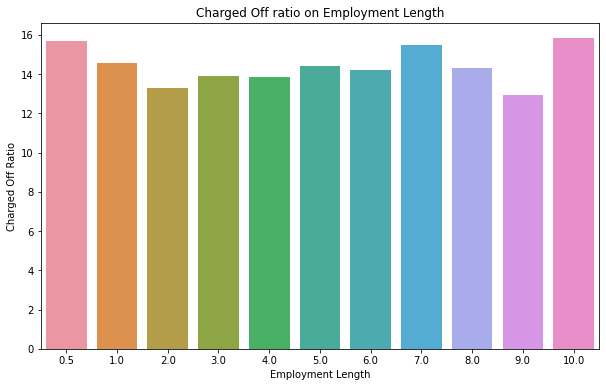

In [82]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['emp_length'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Employment Length', ylabel='Charged Off Ratio', title="Charged Off ratio on Employment Length")
plt.show()

**The above plot shows that there is not much difference in Charged Off ratio according to applicants employment length wise.**

----

In [83]:
# Analysis on Address State wise

ratio_wise = loan.pivot_table(index='addr_state', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Charged Off Ratio
28,NE,3.0,2.0,5.0,60.000000
32,NV,106.0,367.0,473.0,22.410148
40,SD,12.0,50.0,62.0,19.354839
0,AK,14.0,62.0,76.0,18.421053
9,FL,496.0,2234.0,2730.0,18.168498
24,MO,114.0,549.0,663.0,17.194570
11,HI,28.0,138.0,166.0,16.867470
31,NM,30.0,149.0,179.0,16.759777
13,ID,1.0,5.0,6.0,16.666667
36,OR,71.0,363.0,434.0,16.359447


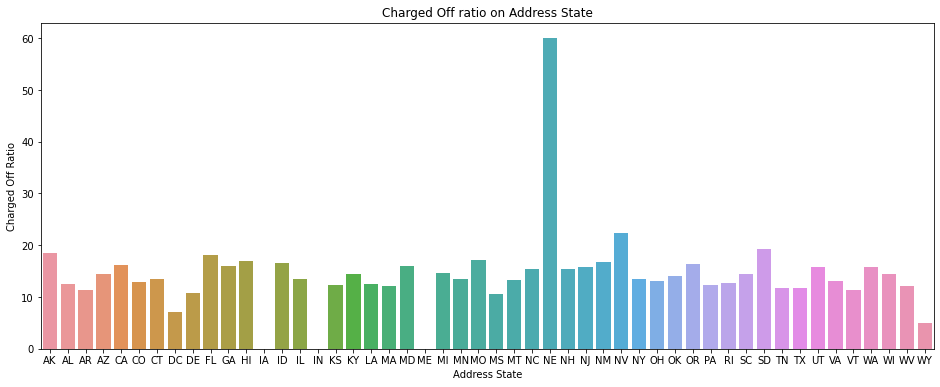

In [84]:
plt.figure(figsize=[16,6])
ax = sns.barplot(ratio_wise['addr_state'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Address State', ylabel='Charged Off Ratio', title="Charged Off ratio on Address State")
plt.show()

**NE state has higher ratio of Charged Off but the count is only 3 so we cannot make any decision on such a low number. On the other hand NV has good number of charged off loans.**

------

In [87]:
# Analysis on Loan Term wise

ratio_wise = loan.pivot_table(index='term', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,term,Charged Off,Fully Paid,Total,Charged Off Ratio
1,60 months,2365,6893,9258,25.545474
0,36 months,3183,25362,28545,11.150815


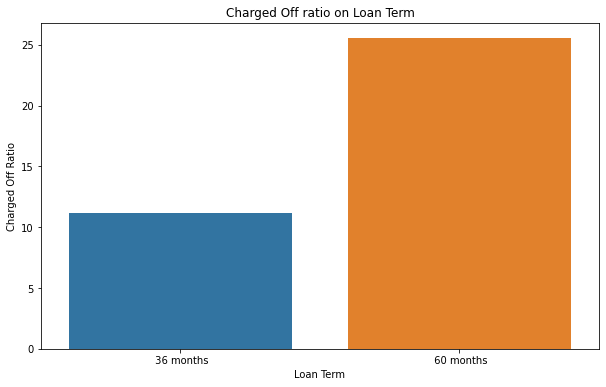

In [88]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['term'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Loan Term', ylabel='Charged Off Ratio', title="Charged Off ratio on Loan Term")
plt.show()

**The 60 months term loans have higher chances of getting Charged Off as compared to 36 months term.**

------

In [89]:
# Analysis on Loan Grade

ratio_wise = loan.pivot_table(index='grade', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Charged Off Ratio
6,G,97,187,284,34.154930
5,F,308,627,935,32.941176
4,E,697,1882,2579,27.025979
3,D,1105,3871,4976,22.206592
2,C,1338,6337,7675,17.433225
1,B,1404,10048,11452,12.259867
0,A,599,9303,9902,6.049283


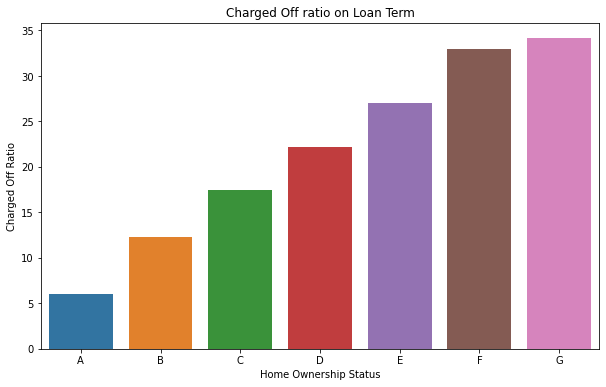

In [90]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['grade'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Home Ownership Status', ylabel='Charged Off Ratio', title="Charged Off ratio on Loan Term")
plt.show()

**The above analysis shows that the ratio of Charged Off increases as the Loan grade is increasing.**

----

In [91]:
# Analysis on Loan Sub-Grade

ratio_wise = loan.pivot_table(index='sub_grade', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Charged Off Ratio
29,F5,53,52,105,50.476190
32,G3,19,24,43,44.186047
31,G2,26,47,73,35.616438
28,F4,51,95,146,34.931507
30,G1,31,61,92,33.695652
34,G5,9,18,27,33.333333
23,E4,125,290,415,30.120482
27,F3,50,117,167,29.940120
26,F2,67,157,224,29.910714
25,F1,87,206,293,29.692833


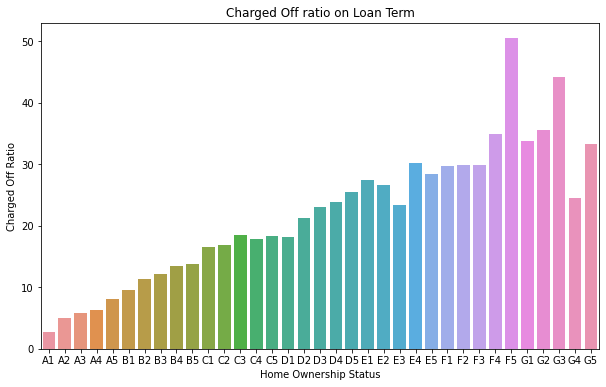

In [92]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['sub_grade'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Home Ownership Status', ylabel='Charged Off Ratio', title="Charged Off ratio on Loan Term")
plt.show()

**The above analysis shows similar trend as in Grade. The proportion of defaulters are increasing as the sub grade is increasing. F5 and G3 has the highest ratio of charged off as compared to others**

---

In [93]:
# Analysis on Loan Amount

ratio_wise = loan.pivot_table(index='loan_amnt_bucket', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,loan_amnt_bucket,Charged Off,Fully Paid,Total,Charged Off Ratio
3,above_15k,1561,6607,8168,19.111166
0,0_5k,1309,8100,9409,13.912212
1,10k_15k,1047,6504,7551,13.865713
2,5k_10k,1631,11044,12675,12.867850


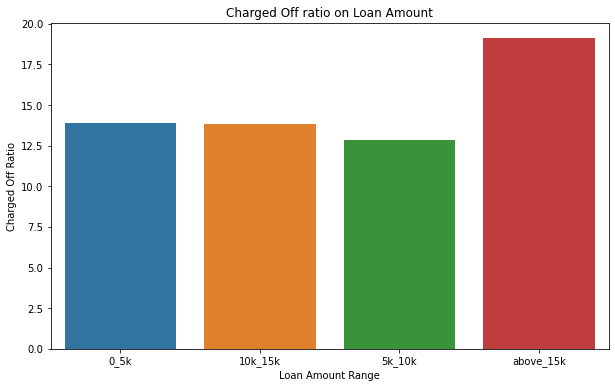

In [94]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['loan_amnt_bucket'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Loan Amount Range', ylabel='Charged Off Ratio', title="Charged Off ratio on Loan Amount")
plt.show()

**There are higher chances of getting Charged Off where loan amount is above 15000.**

-------

In [97]:
# Analysis on Public Records Bankruptcies

ratio_wise = loan.pivot_table(index='pub_rec_bankruptcies', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Charged Off Ratio
2,2.0,2,3,5,40.000000
1,1.0,364,1260,1624,22.413793
0,0.0,5182,30992,36174,14.325206


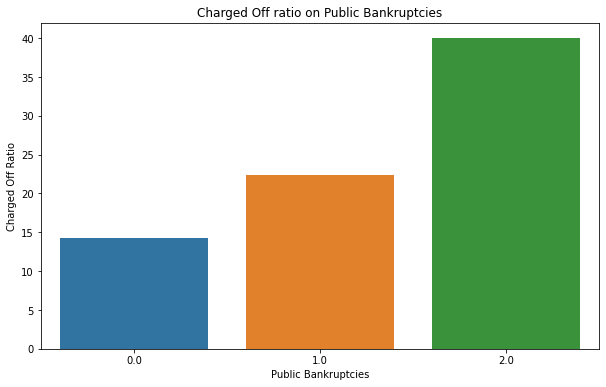

In [98]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['pub_rec_bankruptcies'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Public Bankruptcies', ylabel='Charged Off Ratio', title="Charged Off ratio on Public Bankruptcies")
plt.show()

**The above analysis shows that there are high chances of getting Charged Off if an applicant has previous bankruptcy record.**

------

In [99]:
# Analysis on Public Records 

ratio_wise = loan.pivot_table(index='pub_rec', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Charged Off Ratio
1,1,452.0,1542.0,1994.0,22.668004
2,2,10.0,37.0,47.0,21.276596
0,0,5086.0,30667.0,35753.0,14.225380
3,3,NaN,7.0,NaN,NaN
4,4,NaN,2.0,NaN,NaN


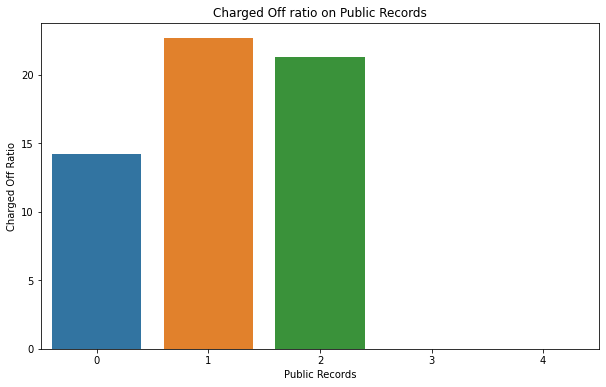

In [100]:
plt.figure(figsize=[10,6])
ax = sns.barplot(ratio_wise['pub_rec'], ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Public Records', ylabel='Charged Off Ratio', title="Charged Off ratio on Public Records")
plt.show()

**There are chances of getting Charged Off if an applicant have previous derogatory public record.**

----

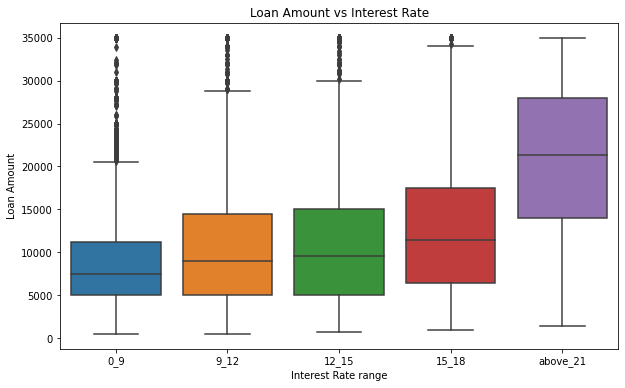

In [108]:
# Loan amount vs interest rate

plt.figure(figsize=[10,6])
ax = sns.boxplot(loan['int_rate_bucket'], loan['loan_amnt'], order=['0_9', '9_12', '12_15', '15_18', 'above_21'])
ax.set(xlabel='Interest Rate range', ylabel='Loan Amount', title="Loan Amount vs Interest Rate")
plt.show()

**The interest rate increases as the Loan amount is increasing.**

---

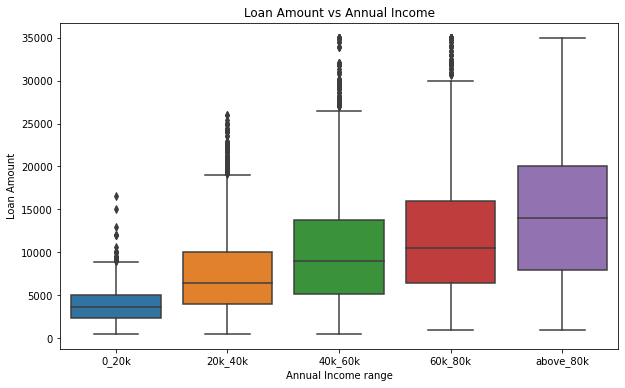

In [109]:
# Loan amount vs annual income
plt.figure(figsize=[10,6])
ax = sns.boxplot(loan['annual_inc_bucket'], loan['loan_amnt'], order=['0_20k', '20k_40k', '40k_60k', '60k_80k', 'above_80k'])
ax.set(xlabel='Annual Income range', ylabel='Loan Amount', title="Loan Amount vs Annual Income")
plt.show()

**Applicants with higher income applied for higher loan amount.**

----

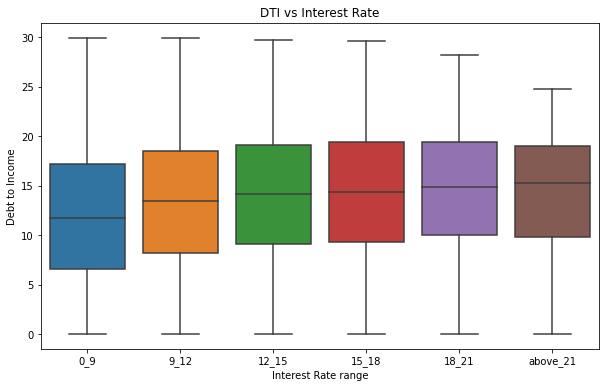

In [110]:
# DTI (Debt to Income) vs interest rate
plt.figure(figsize=[10,6])
ax = sns.boxplot(loan['int_rate_bucket'], loan['dti'], order=['0_9', '9_12', '12_15', '15_18', '18_21', 'above_21'])
ax.set(xlabel='Interest Rate range', ylabel='Debt to Income', title="DTI vs Interest Rate")
plt.show()

**The rate of interest is charged according to the DTI value. The lower DTI have lower interest rate.**

----

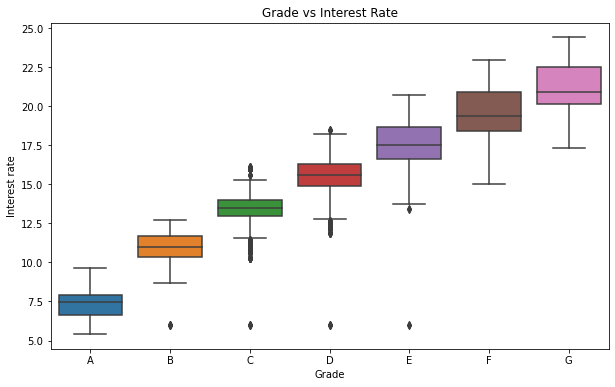

In [107]:
# Loan grade vs interest rate
plt.figure(figsize=[10,6])
ax = sns.boxplot(loan['grade'], loan['int_rate'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set(xlabel='Grade', ylabel='Interest rate', title="Grade vs Interest Rate")
plt.show()

**The rate of interest is increasing according to the Loan Grade number.**

----

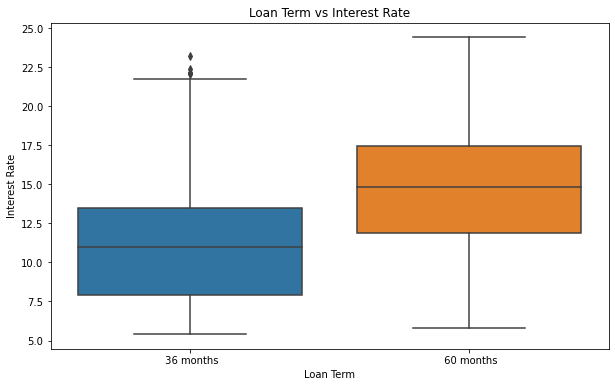

In [111]:
# Loan term vs interest rate
plt.figure(figsize=[10,6])
ax = sns.boxplot(loan['term'], loan['int_rate'])
ax.set(xlabel='Loan Term', ylabel='Interest Rate', title="Loan Term vs Interest Rate")
plt.show()

**60 months term have higher rate of interest than 36 months term.**

----

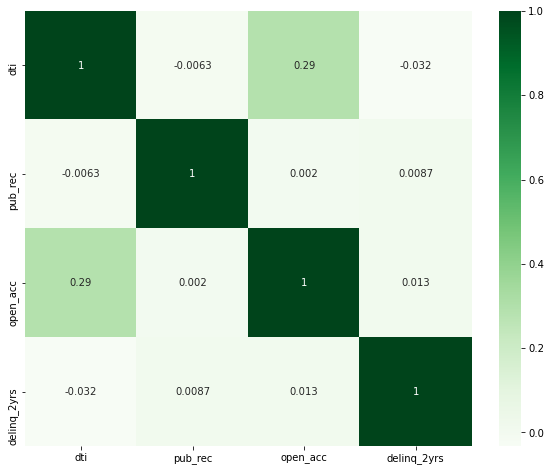

In [112]:
# Checking the correlation between 'dti', 'pub_rec', 'open_acc', 'delinq_2yrs' fields.

plt.figure(figsize = (10,8))
sns.heatmap(loan.loc[:, ['dti', 'pub_rec', 'open_acc', 'delinq_2yrs']].corr(),
           annot = True, cmap = 'Greens')
plt.show()

**The above plot shows that there is a positive correlation betwen DTI and Open Account.**

**On the other hand Public Records and Delinq_2yrs have negative correlation with DTI.**


----

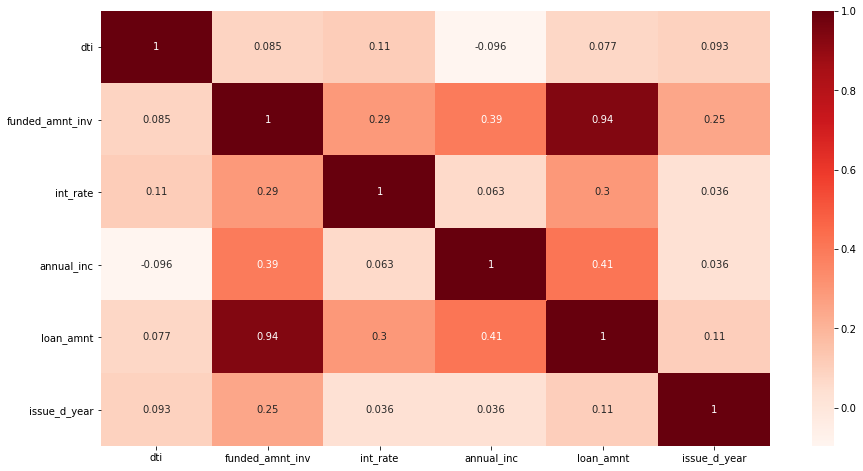

In [114]:
# Checking correlation between 'dti', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'loan_amnt','issue_d_month', 'issue_d_year' fields.

corr = loan.loc[:, [ 'dti', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'loan_amnt','issue_d_month', 'issue_d_year']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='Reds')
plt.show()

**The above heatmap shows the positive correlation between these columns:**

1. Loan amount and funded amount inv is 0.94
2. Annual income and Loan amount is 0.41 
3. Annual income and funded amount inv is 0.39
4. Loan amount and interest rate is 0.30

**And negative correlation between these columns:**

1. DTI and annual income is -.096

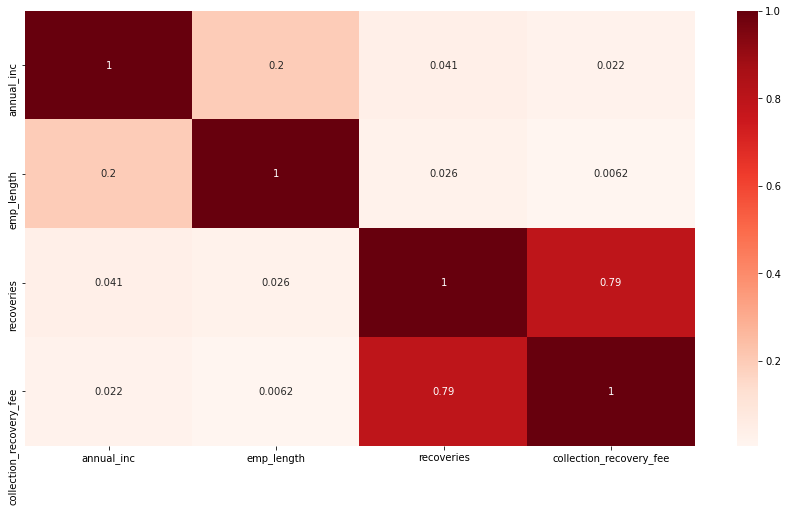

In [115]:
# Checking correlation between 'annual_inc', 'emp_length','recoveries', 'collection_recovery_fee' fields.

corr = loan.loc[:, [ 'annual_inc', 'emp_length','recoveries', 'collection_recovery_fee']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='Reds')
plt.show()

**The above heatmap has mainly positive correlation among each others**


<Figure size 432x720 with 0 Axes>

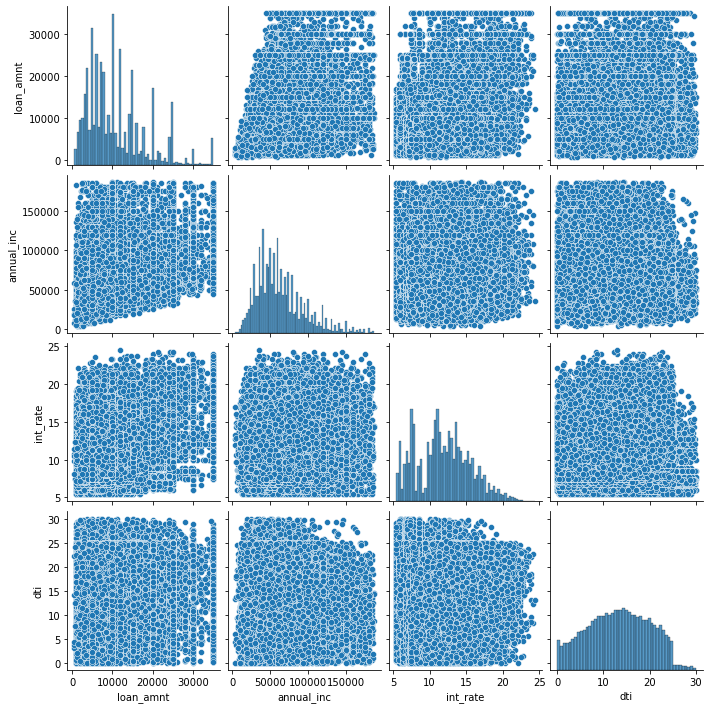

In [116]:
# Checking the pairplot between 'loan_amnt', 'annual_inc', 'int_rate', 'dti' fields.

plt.figure(figsize=(6,10))
sns.pairplot(loan[['loan_amnt', 'annual_inc', 'int_rate', 'dti']])
plt.show()

**The above pairplot shows that Applicants with higher Annual Income applied for higher loan amount.**

---